In [2]:
import matplotlib.pyplot as plt
import numpy as np

in the figure the Dehn twist along the order 4 element 
corresponds to a transvection $(x,y) \mapsto (x, x+y)$
so we see an infinite "periodic" band appearing.

Note that between spikes the boundary is concave.

In [3]:
def acosh(u, default=.5):
    #this will take complex numbers
    u = abs(u)
    if abs(u**2 - 4) < .0001: return default
    return 2*np.log( .5*(u + np.sqrt(u**2 - 4)))


class Markoff(object):
    
    def __init__(self, mn=(3,np.array([1,0]))):
        self.n, self.v = mn
    
    #this is cheating as it breaks the symetry 
    #between + and - 
    #but the subsequent code looks better
    
    def __mul__(self, other):
        return Markoff((self.n*other.n, self.v + other.v))
    
    def __sub__(self, other):
        return Markoff((self.n - other.n, self.v))
    
    def __abs__(self):
        return abs(self.n)
    
    def m2v(self):
        #thisis a dumb name for a function
        length = acosh(self.n)
        #not elegant I want to check if  .real exists
        if not isinstance(length, np.float64):
            length = abs(length.real)
        
        return self.v/length
        
    def __str__(self):
        return str(self.n)
    
    def __repr__(self):
        return repr(self.n)
    
    
# these two are global to tree()
max_depth = 10000
nums = []
# but who cares?

def tree(mt, dd):
    global nums
    dd +=1
    x,y,z = mt
    nums.append(z)
    if abs(z) > max_depth or dd > 20:
        return
    tree((z,y,y*z - x), dd)
    tree((x,z,x*z - y), dd)


In [4]:
nums  = []

def plot_fig(a=3,b=3,c=3, asp_rat=1):
    
    x = Markoff((a, np.array([1,0]) ))
    y = Markoff((b, np.array([0,1]) ))
    z = Markoff((c, np.array([1,1]) ))
    
    tree((x,y,z), dd=0)

    nums.sort(key=lambda x: np.arctan2(x.v[0],x.v[1]))
    TT = [ n.m2v() for n in nums]
    #TT = [v for v in TT if np.linalg.norm(v) < 20]
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_aspect(asp_rat) 
    #ax.axis('off')
    XS, YS = zip(*TT)
    ax.plot(XS,YS,'r-')

    return nums

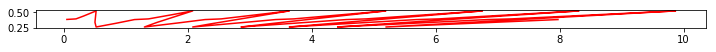

In [24]:
nums = []
nn = plot_fig(1,4,-3)

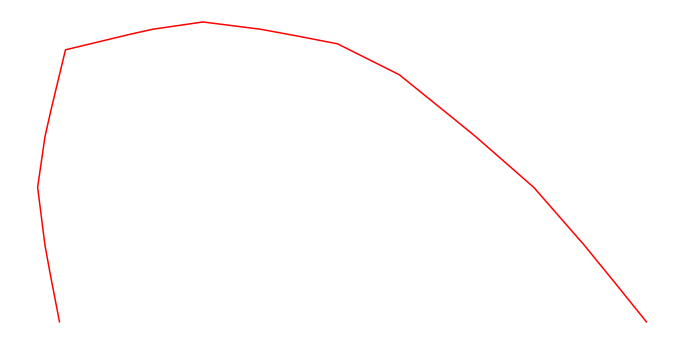

In [5]:
def plot_fig2(a=3,b=3,c=6, asp_rat=1):
    
    x = Markoff((a, np.array([1,0]) ))
    y = Markoff((b, np.array([0,1]) ))
    z = Markoff((c, np.array([1,1]) ))
    
    tree((x,y,z), dd=0)
    x = Markoff((a, np.array([-1,0]) ))
    z = Markoff((a*b-c, np.array([-1,1]) ))
    tree((x,y,z), dd=0)
    nums.sort(key=lambda x: np.arctan2(x.v[0],x.v[1]))
    TT = [ n.m2v() for n in nums]
    #TT = [v for v in TT if np.linalg.norm(v) < 20]
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_aspect(asp_rat) 
    ax.axis('off')
    XS, YS = zip(*TT)
    ax.plot(XS,YS,'r-')


nums = []
plot_fig2()

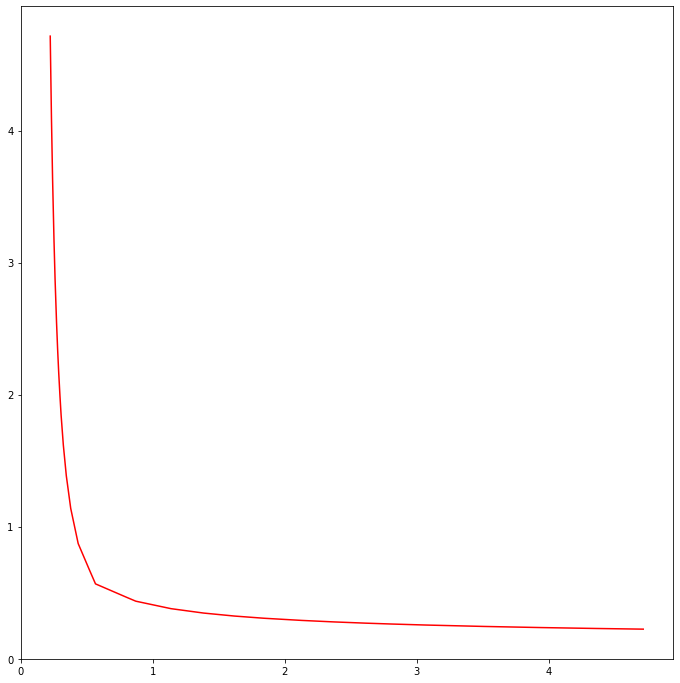

In [6]:
def acosh(u, default=.2):
    #this will take complex numbers
    u = abs(u)
    if abs(u**2 - 4) < .0001: return default
    return np.log( .5*(u + np.sqrt(u**2 - 4)))

nums = []

nn = plot_fig(2,2,6,asp_rat=1)

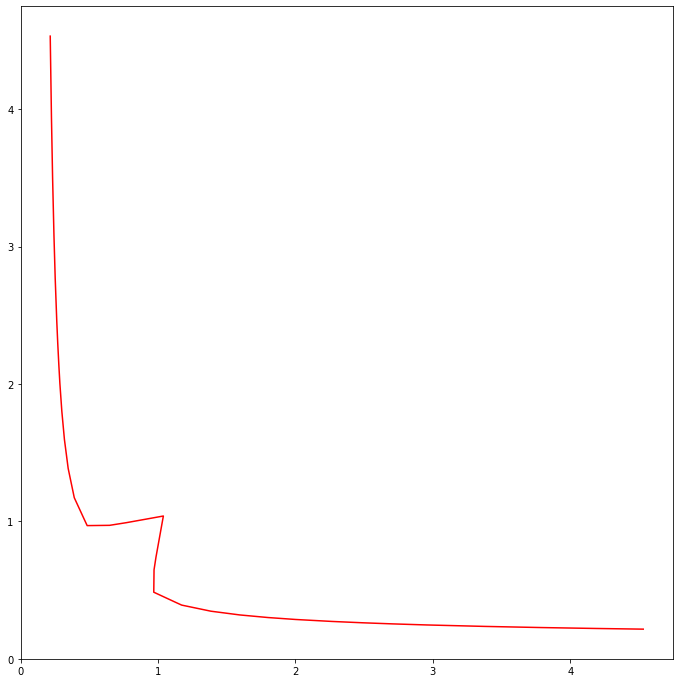

In [7]:
nums = []

nn = plot_fig(2,2,-3, asp_rat=1)

NameError: name 'ww' is not defined